In [1]:
import numpy as np
import pandas as pd
train = pd.read_csv('UNSW_NB15_bayesian_enc_training_set.csv')
test = pd.read_csv('UNSW_NB15_bayesian_enc_testing_set.csv')

In [2]:
x1 = train.iloc[:,1:43]
y1 = train['label']
print(x1)
print(y1)

             dur  spkts  dpkts  sbytes  dbytes           rate  sttl  dttl  \
0       0.121478      6      4     258     172      74.087490   252   254   
1       0.649902     14     38     734   42014      78.473372    62   252   
2       1.623129      8     16     364   13186      14.170161    62   252   
3       1.681642     12     12     628     770      13.677108    62   252   
4       0.449454     10      6     534     268      33.373826   254   252   
...          ...    ...    ...     ...     ...            ...   ...   ...   
175336  0.000009      2      0     114       0  111111.107200   254     0   
175337  0.505762     10      8     620     354      33.612649   254   252   
175338  0.000009      2      0     114       0  111111.107200   254     0   
175339  0.000009      2      0     114       0  111111.107200   254     0   
175340  0.000009      2      0     114       0  111111.107200   254     0   

               sload          dload  ...  ct_dst_src_ltm  is_ftp_login  \
0

In [3]:
x2 = test.iloc[:,1:43]
y2 = test['label']
print(x2)
print(y2)

            dur  spkts  dpkts  sbytes  dbytes           rate  sttl  dttl  \
0      0.000011      2      0     496       0   90909.090200   254     0   
1      0.000008      2      0    1762       0  125000.000300   254     0   
2      0.000005      2      0    1068       0  200000.005100   254     0   
3      0.000006      2      0     900       0  166666.660800   254     0   
4      0.000010      2      0    2126       0  100000.002500   254     0   
...         ...    ...    ...     ...     ...            ...   ...   ...   
82327  0.000005      2      0     104       0  200000.005100   254     0   
82328  1.106101     20      8   18062     354      24.410067   254   252   
82329  0.000000      1      0      46       0       0.000000     0     0   
82330  0.000000      1      0      46       0       0.000000     0     0   
82331  0.000009      2      0     104       0  111111.107200   254     0   

              sload        dload  ...  ct_dst_src_ltm  is_ftp_login  \
0      1.803636e

In [4]:
train["label"].value_counts()

1    119341
0     56000
Name: label, dtype: int64

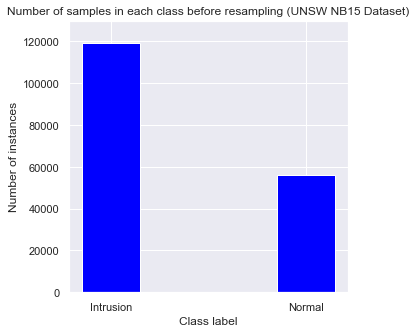

In [258]:
data1 = {'Intrusion':119341, 'Normal':56000}
Class_label = list(data1.keys())
Number_of_instances = list(data1.values())
  
fig = plt.figure(figsize = (5, 5))
 
# creating the bar plot
plt.bar(Class_label, Number_of_instances, color ='blue',
        width = 0.3)
plt.ylim(0, 130000)
plt.xlabel("Class label")
plt.ylabel("Number of instances")
plt.title("Number of samples in each class before resampling (UNSW NB15 Dataset)")
plt.show()

In [5]:
# RESAMPLING

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x1, y1 = sm.fit_sample(x1, y1) 

In [102]:
x1.shape

(238682, 42)

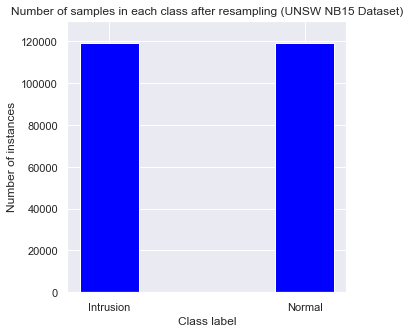

In [259]:
data2 = {'Intrusion':119341, 'Normal':119341}
Class_label = list(data2.keys())
Number_of_instances = list(data2.values())
  
fig = plt.figure(figsize = (5, 5))
 
# creating the bar plot
plt.bar(Class_label, Number_of_instances, color ='blue',
        width = 0.3)
plt.ylim(0, 130000)
plt.xlabel("Class label")
plt.ylabel("Number of instances")
plt.title("Number of samples in each class after resampling (UNSW NB15 Dataset)")
plt.show()

In [6]:
# NORMALIZATION

from sklearn.preprocessing import MinMaxScaler
model = MinMaxScaler()
model.fit(x1)
x1 = model.transform(x1)
x2 = model.transform(x2)

In [7]:
# 1. XGBOOST CLASSIFIER MODEL

from xgboost import XGBClassifier
import xgboost as xgb
params = {
            'objective':'binary:logistic',
            'max_depth': 4, 'min_child_weight': 12, 'gamma': 0.3, 'subsample': 0.6,
            'colsample_bytree': 0.6, 'scale_pos_weight': 1,
            'alpha': 0.05,
            'learning_rate': 0.01,
            'n_estimators':1484,'seed': 27
         }
xgb_clf = XGBClassifier(**params)
xgb_clf.fit(x1, y1)

C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:39:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(alpha=0.05, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, gamma=0.3, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=12, missing=nan, monotone_constraints='()',
              n_estimators=1484, n_jobs=4, num_parallel_tree=1,
              predictor='auto', random_state=27, reg_alpha=0.0500000007,
              reg_lambda=1, scale_pos_weight=1, seed=27, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [8]:
y_pred_xgb=xgb_clf.predict(x2)
print(y_pred_xgb)

[1 1 1 ... 0 0 1]


In [9]:
# ROC AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y2, y_pred_xgb)
print('ROC AUC: %f' % auc)

ROC AUC: 0.893511


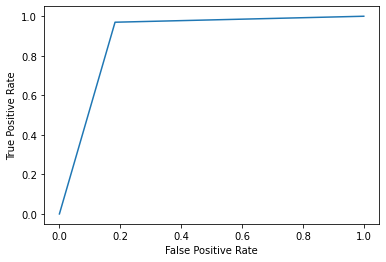

In [11]:
from matplotlib import pyplot as plt
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_xgb)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [12]:
from sklearn import metrics
from sklearn.metrics import f1_score

print('Accuracy in XGBoost classifier model = ', metrics.accuracy_score(y2, y_pred_xgb)*100)
print("Confusion Matrix =", metrics.confusion_matrix(y2, y_pred_xgb, labels=None, 
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y2, y_pred_xgb, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Precision =", metrics.precision_score(y2, y_pred_xgb, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y2, y_pred_xgb, 
                                                                 labels=None, 
                                                                 target_names=None, 
                                                                 sample_weight=None, 
                                                                 digits=2, 
                                                                 output_dict=False))
print("F1 Score = ",f1_score(y2, y_pred_xgb, average='macro'))

Accuracy in XGBoost classifier model =  90.1229169703153
Confusion Matrix = [[30238  6762]
 [ 1370 43962]]
Recall = 0.901229169703153
Precision = 0.9071211418448522
Classification Report =
               precision    recall  f1-score   support

           0       0.96      0.82      0.88     37000
           1       0.87      0.97      0.92     45332

    accuracy                           0.90     82332
   macro avg       0.91      0.89      0.90     82332
weighted avg       0.91      0.90      0.90     82332

F1 Score =  0.8984062997805073


<AxesSubplot:>

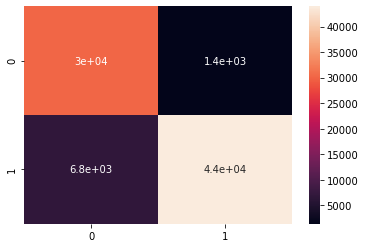

In [13]:
cm_xgb = metrics.confusion_matrix(y_pred_xgb, y2, labels=None, 
                                              sample_weight=None)
import seaborn as sns
sns.heatmap(cm_xgb, annot=True)

<AxesSubplot:>

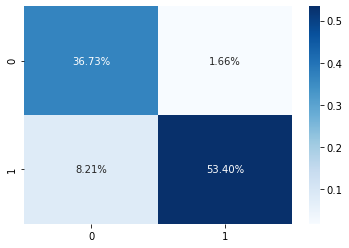

In [14]:
sns.heatmap(cm_xgb/np.sum(cm_xgb), annot=True, 
            fmt='.2%', cmap='Blues')

In [220]:
# 2. DNN CLASSIFIER MODEL

from tensorflow import keras
model_DNN=keras.models.Sequential()
model_DNN.add(keras.layers.Dense(units=42, activation = "relu",input_shape = x1.shape[1:]))
model_DNN.add(keras.layers.Dense(units=84,activation = "relu"))
model_DNN.add(keras.layers.Dropout(0.25))
model_DNN.add(keras.layers.Dense(units=168,activation = "relu" ))
model_DNN.add(keras.layers.Dropout(0.25))
model_DNN.add(keras.layers.Dense(units=336,activation = "relu" ))
model_DNN.add(keras.layers.Dropout(0.25))
model_DNN.add(keras.layers.Dense(units=672,activation = "relu" ))
model_DNN.add(keras.layers.Dense(units=2, activation = "sigmoid"))
model_DNN.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 42)                1806      
                                                                 
 dense_59 (Dense)            (None, 84)                3612      
                                                                 
 dropout_21 (Dropout)        (None, 84)                0         
                                                                 
 dense_60 (Dense)            (None, 168)               14280     
                                                                 
 dropout_22 (Dropout)        (None, 168)               0         
                                                                 
 dense_61 (Dense)            (None, 336)               56784     
                                                                 
 dropout_23 (Dropout)        (None, 336)             

In [221]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model_DNN.compile(loss="sparse_categorical_crossentropy",optimizer=opt,metrics="accuracy")
es=keras.callbacks.EarlyStopping(monitor='loss',patience=10,restore_best_weights=True)
cp=keras.callbacks.ModelCheckpoint("SaranyaDNNNet.h5",monitor='val_loss')
history = model_DNN.fit(x1,y1,epochs=50,batch_size=16,callbacks=[es,cp],validation_data = [x2, y2])
testloss,testaccuracy=model_DNN.evaluate(x2,y2)
print("Test loss = ",testloss)
print("Test accuracy = ",testaccuracy)

Epoch 1/50
14918/14918 [==============================] - 99s 6ms/step - loss: 0.3200 - accuracy: 0.8697 - val_loss: 0.4966 - val_accuracy: 0.7508
Epoch 2/50
14918/14918 [==============================] - 202s 14ms/step - loss: 0.3817 - accuracy: 0.8650 - val_loss: 0.5064 - val_accuracy: 0.7662
Epoch 3/50
14918/14918 [==============================] - 139s 8ms/step - loss: 0.5603 - accuracy: 0.8078 - val_loss: 0.6688 - val_accuracy: 0.7660
Epoch 4/50
14918/14918 [==============================] - 134s 9ms/step - loss: 0.3492 - accuracy: 0.8681 - val_loss: 0.4878 - val_accuracy: 0.7664
Epoch 5/50
14918/14918 [==============================] - 115s 8ms/step - loss: 0.5747 - accuracy: 0.8607 - val_loss: 0.4933 - val_accuracy: 0.7664
Epoch 6/50
14918/14918 [==============================] - 90s 6ms/step - loss: 0.4583 - accuracy: 0.8450 - val_loss: 0.4979 - val_accuracy: 0.7664
Epoch 7/50
14918/14918 [==============================] - 186s 12ms/step - loss: 0.3853 - accuracy: 0.8729 - val_

In [222]:
y_predicted_DNN = model_DNN.predict(x2)
y_predicted_class_DNN=np.argmax(y_predicted_DNN,axis=1)
print(y_predicted_class_DNN)
print("Test Loss =",testloss)
print("Test Accuracy =",testaccuracy)

[1 1 1 ... 0 0 1]
Test Loss = 0.49659720063209534
Test Accuracy = 0.7508016228675842


In [223]:
# ROC AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y2, y_predicted_class_DNN)
print('ROC AUC: %f' % auc)

ROC AUC: 0.722756


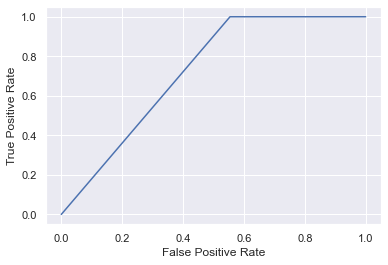

In [224]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y2,  y_predicted_class_DNN)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [225]:
from sklearn import metrics
from sklearn.metrics import f1_score
print('Accuracy with DNN classifier model = ', metrics.accuracy_score(y_predicted_class_DNN, y2)*100)
print("Confusion Matrix =", metrics.confusion_matrix(y_predicted_class_DNN, y2, labels=None, 
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y_predicted_class_DNN, y2, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Precision =", metrics.precision_score(y_predicted_class_DNN, y2, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y_predicted_class_DNN, y2, 
                                                                 labels=None, 
                                                                 target_names=None, 
                                                                 sample_weight=None, 
                                                                 digits=2, 
                                                                 output_dict=False))
print("F1 Score = ",f1_score(y_predicted_class_DNN, y2, average='macro'))

Accuracy with DNN classifier model =  75.08016324150998
Confusion Matrix = [[16488     5]
 [20512 45327]]
Recall = 0.7508016324150998
Precision = 0.8888570123088142
Classification Report =
               precision    recall  f1-score   support

           0       0.45      1.00      0.62     16493
           1       1.00      0.69      0.82     65839

    accuracy                           0.75     82332
   macro avg       0.72      0.84      0.72     82332
weighted avg       0.89      0.75      0.78     82332

F1 Score =  0.7159504818613832


<AxesSubplot:>

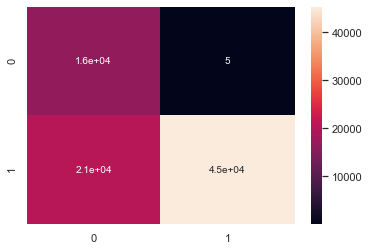

In [226]:
cm_DNN = metrics.confusion_matrix(y_predicted_class_DNN, y2, labels=None, 
                                              sample_weight=None)
import seaborn as sns
sns.heatmap(cm_DNN, annot=True)

<AxesSubplot:>

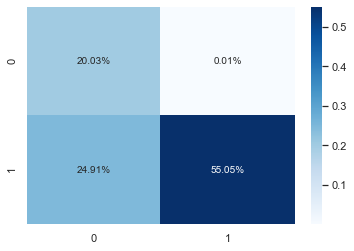

In [227]:
sns.heatmap(cm_DNN/np.sum(cm_DNN), annot=True, 
            fmt='.2%', cmap='Blues')

In [208]:
# 3. CNN CLASSIFIER MODEL

x1_CNN = np.reshape(x1, (x1.shape[0],x1.shape[1],1))
x2_CNN = np.reshape(x2, (x2.shape[0],x2.shape[1],1))

In [209]:
from tensorflow import keras
from tensorflow.keras.layers import Input
from keras.layers import Convolution1D, Dense, Dropout, MaxPooling1D, LSTM
from keras.layers import Dense, Dropout, Activation, Lambda, Flatten
convnet=keras.models.Sequential()
convnet.add(keras.layers.Convolution1D(42,3,activation="relu",input_shape=(42,1)))
convnet.add(keras.layers.Convolution1D(84,3,activation="relu"))
convnet.add(keras.layers.BatchNormalization())
convnet.add(keras.layers.MaxPooling1D(2,2))
convnet.add(keras.layers.Dropout(0.25))
convnet.add(keras.layers.Flatten())
convnet.add(keras.layers.Dense(168,activation="relu"))
convnet.add(keras.layers.Dropout(0.25))
convnet.add(keras.layers.Dense(2,activation="softmax"))
convnet.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 40, 42)            168       
                                                                 
 conv1d_9 (Conv1D)           (None, 38, 84)            10668     
                                                                 
 batch_normalization_4 (Batc  (None, 38, 84)           336       
 hNormalization)                                                 
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 19, 84)           0         
 1D)                                                             
                                                                 
 dropout_19 (Dropout)        (None, 19, 84)            0         
                                                                 
 flatten_4 (Flatten)         (None, 1596)            

In [210]:
opt = keras.optimizers.Adam(learning_rate=0.01)
convnet.compile(loss="sparse_categorical_crossentropy",optimizer=opt,metrics="accuracy")
es=keras.callbacks.EarlyStopping(monitor='loss',patience=10,restore_best_weights=True)
cp=keras.callbacks.ModelCheckpoint("SaranyaConvNet.h5",monitor='val_loss')
history = convnet.fit(x1_CNN,y1,epochs=50,batch_size=16,callbacks=[es,cp],validation_data = [x2_CNN, y2])
testloss,testaccuracy=convnet.evaluate(x2_CNN,y2)
print("Test Loss =",testloss)
print("Test Accuracy =",testaccuracy)

Epoch 1/50
14918/14918 [==============================] - 194s 12ms/step - loss: 0.1959 - accuracy: 0.8984 - val_loss: 0.3032 - val_accuracy: 0.7868
Epoch 2/50
14918/14918 [==============================] - 166s 11ms/step - loss: 0.2076 - accuracy: 0.8942 - val_loss: 0.3294 - val_accuracy: 0.7870
Epoch 3/50
14918/14918 [==============================] - 172s 12ms/step - loss: 0.2197 - accuracy: 0.8925 - val_loss: 0.3516 - val_accuracy: 0.7869
Epoch 4/50
14918/14918 [==============================] - 167s 11ms/step - loss: 0.2218 - accuracy: 0.8949 - val_loss: 0.3518 - val_accuracy: 0.7871
Epoch 5/50
14918/14918 [==============================] - 168s 11ms/step - loss: 0.2342 - accuracy: 0.8947 - val_loss: 0.3294 - val_accuracy: 0.7871
Epoch 6/50
14918/14918 [==============================] - 164s 11ms/step - loss: 0.2230 - accuracy: 0.8949 - val_loss: 0.3655 - val_accuracy: 0.7869
Epoch 7/50
14918/14918 [==============================] - 162s 11ms/step - loss: 0.2299 - accuracy: 0.8944

In [211]:
y_predicted_CNN = convnet.predict(x2_CNN)
y_predicted_class_CNN=np.argmax(y_predicted_CNN,axis=1)
print(y_predicted_class_CNN)

[1 1 1 ... 0 0 1]


In [212]:
# ROC AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y2, y_predicted_class_CNN)
print('ROC AUC: %f' % auc)

ROC AUC: 0.762829


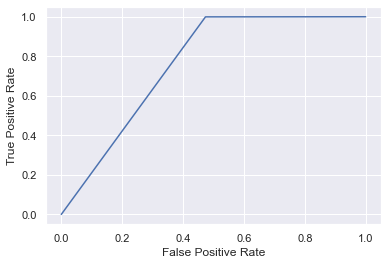

In [213]:
fpr, tpr, _ = metrics.roc_curve(y2,  y_predicted_class_CNN)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [214]:
from sklearn import metrics
from sklearn.metrics import f1_score
print('Accuracy with CNN classifier model = ', metrics.accuracy_score(y_predicted_class_CNN, y2)*100)
print("Confusion Matrix =", metrics.confusion_matrix(y_predicted_class_CNN, y2, labels=None, 
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y_predicted_class_CNN, y2, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Precision =", metrics.precision_score(y_predicted_class_CNN, y2, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y_predicted_class_CNN, y2, 
                                                                 labels=None, 
                                                                 target_names=None, 
                                                                 sample_weight=None, 
                                                                 digits=2, 
                                                                 output_dict=False))
print("F1 Score = ",f1_score(y_predicted_class_CNN, y2, average='macro'))

Accuracy with CNN classifier model =  78.67657775834427
Confusion Matrix = [[19473    29]
 [17527 45303]]
Recall = 0.7867657775834427
Precision = 0.8873057376127149
Classification Report =
               precision    recall  f1-score   support

           0       0.53      1.00      0.69     19502
           1       1.00      0.72      0.84     62830

    accuracy                           0.79     82332
   macro avg       0.76      0.86      0.76     82332
weighted avg       0.89      0.79      0.80     82332

F1 Score =  0.7634866238039846


<AxesSubplot:>

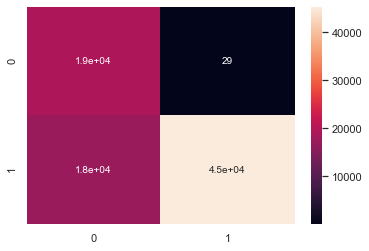

In [215]:
cm_CNN = metrics.confusion_matrix(y_predicted_class_CNN, y2, labels=None, 
                                              sample_weight=None)
import seaborn as sns
sns.heatmap(cm_CNN, annot=True)

<AxesSubplot:>

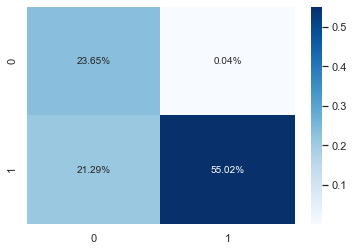

In [216]:
sns.heatmap(cm_CNN/np.sum(cm_CNN), annot=True, 
            fmt='.2%', cmap='Blues')

In [36]:
# 4. TCN CLASSIFIER MODEL

print(x1.shape[0])
print(x2.shape[0])

238682
82332


In [37]:
print(x1.shape, y1.shape, x2.shape, y2.shape)
x1_TCN = np.reshape(x1, (x1.shape[0],x1.shape[1],1))
x2_TCN = np.reshape(x2, (x2.shape[0],x2.shape[1],1))
print(x1_TCN.shape, y1.shape, x2_TCN.shape, y2.shape)

(238682, 42) (238682,) (82332, 42) (82332,)
(238682, 42, 1) (238682,) (82332, 42, 1) (82332,)


In [38]:
from tensorflow.keras.utils import to_categorical
num_classes = 2
y1_TCN = to_categorical(y1, num_classes)
y2_TCN = to_categorical(y2, num_classes)
print(x1_TCN.shape, y1_TCN.shape, x2_TCN.shape, y2_TCN.shape)

(238682, 42, 1) (238682, 2) (82332, 42, 1) (82332, 2)


In [39]:
y1_TCN = np.expand_dims(y1_TCN, axis=2)
y2_TCN = np.expand_dims(y2_TCN, axis=2)
print(x1_TCN.shape, y1_TCN.shape, x2_TCN.shape, y2_TCN.shape)

(238682, 42, 1) (238682, 2, 1) (82332, 42, 1) (82332, 2, 1)


In [40]:
!pip install keras-tcn

In [41]:
import numpy as np
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense, Dropout, Embedding
from tensorflow.keras.preprocessing import sequence
from tcn import compiled_tcn

In [42]:
model_TCN = compiled_tcn(return_sequences = False,num_feat = 1, num_classes = 2, nb_filters = 64,kernel_size=6,
                    dilations=[1,2,4,8,16,32,64],nb_stacks=1, opt='adam',lr=0.002,activation = 'relu',kernel_initializer = 
                    'he_normal',use_batch_norm=True,use_layer_norm = False,use_weight_norm = False,max_len=x1_TCN[0:1].shape[1],
                     use_skip_connections=True) 

x.shape= (None, 64)
model.x = (None, 42, 1)
model.y = (None, 2)


C:\Users\admin\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [43]:
print(x1_TCN[0:1].shape[1])

42


In [44]:
print(f'x_train.shape = {x1_TCN.shape}')
print(f'y_train.shape = {y1_TCN.shape}')
print(f'x_test.shape = {x2_TCN.shape}')
print(f'y_test.shape = {y2_TCN.shape}')

x_train.shape = (238682, 42, 1)
y_train.shape = (238682, 2, 1)
x_test.shape = (82332, 42, 1)
y_test.shape = (82332, 2, 1)


In [45]:
model_TCN.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 42, 1)]           0         
                                                                 
 tcn (TCN)                   (None, 64)                324480    
                                                                 
 dense_8 (Dense)             (None, 2)                 130       
                                                                 
 activation (Activation)     (None, 2)                 0         
                                                                 
Total params: 324,610
Trainable params: 322,818
Non-trainable params: 1,792
_________________________________________________________________


In [46]:
y1_TCN = y1_TCN.squeeze().argmax(axis=1)
y2_TCN = y2_TCN.squeeze().argmax(axis=1)

In [47]:
history = model_TCN.fit(x1_TCN, y1_TCN, epochs = 10, validation_data = [x2_TCN, y2_TCN], workers=4, use_multiprocessing=True)

Epoch 1/10
7459/7459 [==============================] - 1536s 205ms/step - loss: 0.1380 - accuracy: 0.9333 - val_loss: 0.2139 - val_accuracy: 0.9071
Epoch 2/10
7459/7459 [==============================] - 1536s 206ms/step - loss: 0.1156 - accuracy: 0.9428 - val_loss: 0.2201 - val_accuracy: 0.8992
Epoch 3/10
7459/7459 [==============================] - 1536s 206ms/step - loss: 0.1109 - accuracy: 0.9450 - val_loss: 0.1951 - val_accuracy: 0.9099
Epoch 4/10
7459/7459 [==============================] - 4071s 546ms/step - loss: 0.1086 - accuracy: 0.9463 - val_loss: 0.2296 - val_accuracy: 0.8901
Epoch 5/10
7459/7459 [==============================] - 1601s 215ms/step - loss: 0.1069 - accuracy: 0.9471 - val_loss: 0.1824 - val_accuracy: 0.9147
Epoch 6/10
7459/7459 [==============================] - 1565s 210ms/step - loss: 0.1055 - accuracy: 0.9478 - val_loss: 0.2024 - val_accuracy: 0.9071
Epoch 7/10
7459/7459 [==============================] - 1615s 217ms/step - loss: 0.1041 - accuracy: 0.9482

In [48]:
result = model_TCN.evaluate(x2_TCN, y2_TCN)
print(f"Accuracy : {result[1] * 100:.2f} %")
print(f"Loss : {result[0] * 100:.2f} %")

2573/2573 [==============================] - 123s 48ms/step - loss: 0.1948 - accuracy: 0.9094
Accuracy : 90.94 %
Loss : 19.48 %


In [50]:
y_pred_TCN = model_TCN.predict(x2_TCN, verbose=0)
print(np.argmax(y_pred_TCN, axis=1))
y_pred_class_TCN=np.argmax(y_pred_TCN,axis=1)
print(y_pred_class_TCN)

[1 1 1 ... 0 0 0]
[1 1 1 ... 0 0 0]


In [51]:
# ROC AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y2_TCN, y_pred_class_TCN)
print('ROC AUC: %f' % auc)

ROC AUC: 0.903312


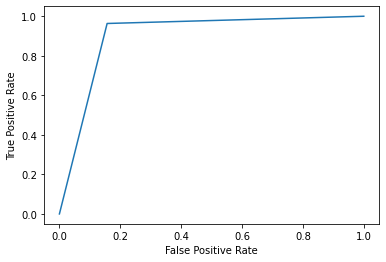

In [52]:
fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_class_TCN)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [53]:
from sklearn import metrics
from sklearn.metrics import f1_score
print('Accuracy with TCN classifier model = ', metrics.accuracy_score(y_pred_class_TCN, y2_TCN)*100)
print("Confusion Matrix =", metrics.confusion_matrix(y_pred_class_TCN, y2_TCN, labels=None, 
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y_pred_class_TCN, y2_TCN, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Precision =", metrics.precision_score(y_pred_class_TCN, y2_TCN, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y_pred_class_TCN, y2_TCN, 
                                                                 labels=None, 
                                                                 target_names=None, 
                                                                 sample_weight=None, 
                                                                 digits=2, 
                                                                 output_dict=False))
print("F1 Score = ",f1_score(y_pred_class_TCN, y2_TCN, average='macro'))

Accuracy with TCN classifier model =  90.93912452023515
Confusion Matrix = [[31200  1660]
 [ 5800 43672]]
Recall = 0.9093912452023515
Precision = 0.9154322918826371
Classification Report =
               precision    recall  f1-score   support

           0       0.84      0.95      0.89     32860
           1       0.96      0.88      0.92     49472

    accuracy                           0.91     82332
   macro avg       0.90      0.92      0.91     82332
weighted avg       0.92      0.91      0.91     82332

F1 Score =  0.9072631692529096


<AxesSubplot:>

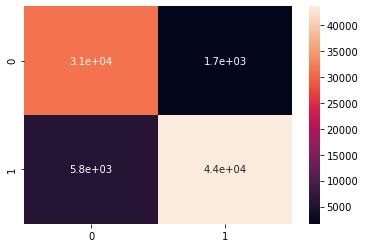

In [54]:
cm_TCN = metrics.confusion_matrix(y_pred_class_TCN, y2, labels=None, 
                                              sample_weight=None)
import seaborn as sns
sns.heatmap(cm_TCN, annot=True)

<AxesSubplot:>

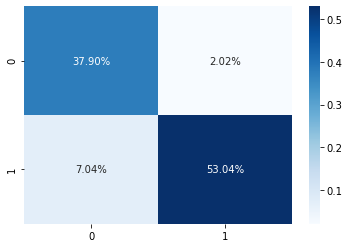

In [55]:
sns.heatmap(cm_TCN/np.sum(cm_TCN), annot=True, 
            fmt='.2%', cmap='Blues')

In [191]:
# 5. TabNet CLASSIFIER MODEL

print("X train shape: ", x1.shape)
print("X test shape: ", x2.shape)
print("Y train shape: ", y1.shape)
print("Y test shape: ", y2.shape)

X train shape:  (238682, 42)
X test shape:  (82332, 42)
Y train shape:  (238682,)
Y test shape:  (82332,)


In [192]:
!pip install pytorch-tabnet
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

In [228]:
# define the model
model_tabnet = TabNetClassifier(optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=5e-2),
                       scheduler_params={"step_size":10,"gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='entmax')

Device used : cpu


In [229]:
# fit the model 
model_tabnet.fit(x1,y1, eval_set=[(x1, y1), (x2, y2)],eval_name=['train', 'valid'],
                   eval_metric=['auc','accuracy'],
                   max_epochs=20 , patience=50, batch_size=256, virtual_batch_size=128, num_workers=0, weights=1,
                   drop_last=False)   

epoch 0  | loss: 0.16036 | train_auc: 0.9888  | train_accuracy: 0.93356 | valid_auc: 0.9623  | valid_accuracy: 0.87897 |  0:02:58s
epoch 1  | loss: 0.13573 | train_auc: 0.98917 | train_accuracy: 0.93264 | valid_auc: 0.96544 | valid_accuracy: 0.88091 |  0:04:51s
epoch 2  | loss: 0.12792 | train_auc: 0.9899  | train_accuracy: 0.93757 | valid_auc: 0.96531 | valid_accuracy: 0.85935 |  0:06:42s
epoch 3  | loss: 0.12862 | train_auc: 0.98928 | train_accuracy: 0.93625 | valid_auc: 0.96534 | valid_accuracy: 0.85933 |  0:08:33s
epoch 4  | loss: 0.12427 | train_auc: 0.99069 | train_accuracy: 0.93735 | valid_auc: 0.96856 | valid_accuracy: 0.88695 |  0:10:22s
epoch 5  | loss: 0.12147 | train_auc: 0.99058 | train_accuracy: 0.94044 | valid_auc: 0.97514 | valid_accuracy: 0.88801 |  0:12:14s
epoch 6  | loss: 0.11984 | train_auc: 0.99145 | train_accuracy: 0.93995 | valid_auc: 0.97858 | valid_accuracy: 0.90799 |  0:14:05s
epoch 7  | loss: 0.11932 | train_auc: 0.99144 | train_accuracy: 0.94424 | valid_auc

Text(0, 0.5, 'Feature index')

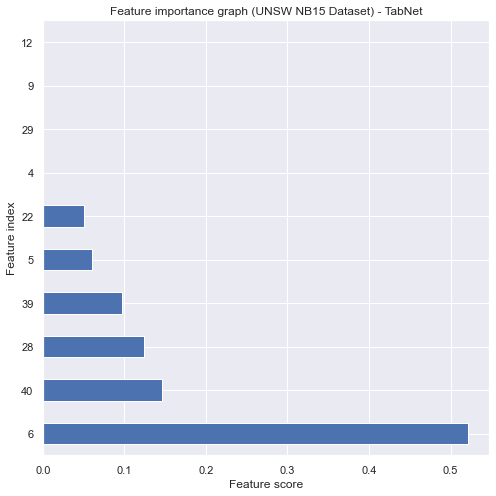

In [256]:
# find and plot feature importance
from IPython.core.pylabtools import figsize
figsize(8, 8)
model_tabnet.feature_importances_
feat_importances = pd.Series(model_tabnet.feature_importances_)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Feature importance graph (UNSW NB15 Dataset) - TabNet")
plt.xlabel("Feature score")
plt.ylabel("Feature index")

In [231]:
y_pred_TabNet = model_tabnet.predict(x2)
print(y_pred_TabNet)

[1 1 0 ... 0 0 1]


In [232]:
# ROC AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y2, y_pred_TabNet)
print('ROC AUC: %f' % auc)

ROC AUC: 0.916144


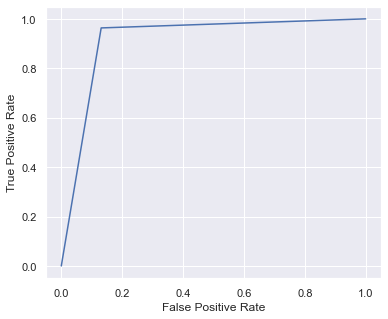

In [270]:
figsize(6, 5)
fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_TabNet)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [234]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import f1_score
test_acc = accuracy_score(y_pred_TabNet, y2)
print("Accuracy in TabNet classifier model:",test_acc*100)
print("Confusion Matrix =", metrics.confusion_matrix(y_pred_TabNet, y2, labels=None, 
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y_pred_TabNet, y2, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Precision =", metrics.precision_score(y_pred_TabNet, y2, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y_pred_TabNet, y2, 
                                                                 labels=None, 
                                                                 target_names=None, 
                                                                 sample_weight=None, 
                                                                 digits=2, 
                                                                 output_dict=False))
print("F1 Score = ",f1_score(y_pred_TabNet, y2, average='macro'))

Accuracy in TabNet classifier model: 92.09177476558324
Confusion Matrix = [[32152  1663]
 [ 4848 43669]]
Recall = 0.9209177476558325
Precision = 0.924567357365638
Classification Report =
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     33815
           1       0.96      0.90      0.93     48517

    accuracy                           0.92     82332
   macro avg       0.92      0.93      0.92     82332
weighted avg       0.92      0.92      0.92     82332

F1 Score =  0.9193393993269945


<AxesSubplot:>

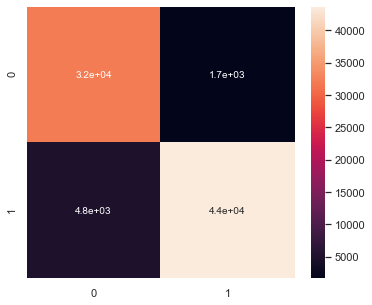

In [251]:
figsize(6, 5)
cm_TabNet = metrics.confusion_matrix(y_pred_TabNet, y2, labels=None, 
                                              sample_weight=None)
import seaborn as sns
sns.heatmap(cm_TabNet, annot=True)

<AxesSubplot:>

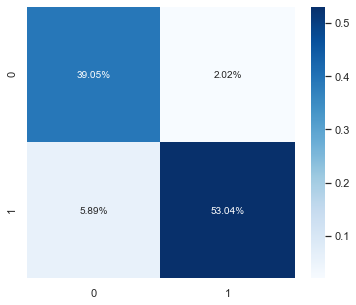

In [252]:
figsize(6, 5)
sns.heatmap(cm_TabNet/np.sum(cm_TabNet), annot=True, 
            fmt='.2%', cmap='Blues')

In [237]:
print("Number of selected features=%d" % (x1.shape[1]))
print('Accuracy result of all models:')
print('Accuracy in XGBoost classifier model = ', metrics.accuracy_score(y2, y_pred_xgb)*100)
print('Accuracy in DNN classifier model = ', metrics.accuracy_score(y_predicted_class_DNN, y2)*100)
print('Accuracy in CNN classifier model = ', metrics.accuracy_score(y_predicted_class_CNN, y2)*100)
print('Accuracy in TCN classifier model = ', metrics.accuracy_score(y_pred_class_TCN, y2_TCN)*100)
print("Accuracy in TabNet classifier model:",test_acc*100)

Number of selected features=42
Accuracy result of all models:
Accuracy in XGBoost classifier model =  90.1229169703153
Accuracy in DNN classifier model =  75.08016324150998
Accuracy in CNN classifier model =  78.67657775834427
Accuracy in TCN classifier model =  90.93912452023515
Accuracy in TabNet classifier model: 92.09177476558324


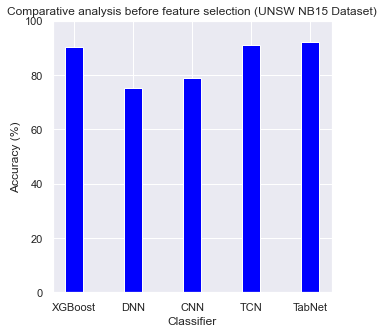

In [272]:
data = {'XGBoost':90.1, 'DNN':75.1, 'CNN':78.7,
        'TCN':90.9, 'TabNet':92.1}
Classifier_model = list(data.keys())
Classifier_accuracy = list(data.values())
  
fig = plt.figure(figsize = (5, 5))
 
# creating the bar plot
plt.bar(Classifier_model, Classifier_accuracy, color ='blue',
        width = 0.3)
plt.ylim(0, 100)
plt.xlabel("Classifier")
plt.ylabel("Accuracy (%)")
plt.title("Comparative analysis before feature selection (UNSW NB15 Dataset)")
plt.show()

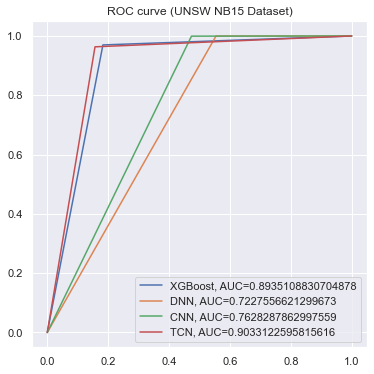

In [274]:
figsize(6, 6)
#set up plotting area
plt.figure(0).clf()

fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_xgb)
auc = roc_auc_score(y2, y_pred_xgb)
plt.plot(fpr,tpr,label="XGBoost, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y2,  y_predicted_class_DNN)
auc = roc_auc_score(y2, y_predicted_class_DNN)
plt.plot(fpr,tpr,label="DNN, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y2,  y_predicted_class_CNN)
auc = roc_auc_score(y2, y_predicted_class_CNN)
plt.plot(fpr,tpr,label="CNN, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_class_TCN)
auc = roc_auc_score(y2, y_pred_class_TCN)
plt.plot(fpr,tpr,label="TCN, AUC="+str(auc))

#add legend
plt.title("ROC curve (UNSW NB15 Dataset)")
plt.legend()

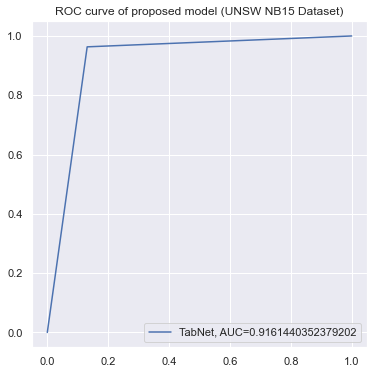

In [266]:
fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_TabNet)
auc = roc_auc_score(y2, y_pred_TabNet)
plt.plot(fpr,tpr,label="TabNet, AUC="+str(auc))
#add legend
plt.title("ROC curve of proposed model (UNSW NB15 Dataset)")
plt.legend()

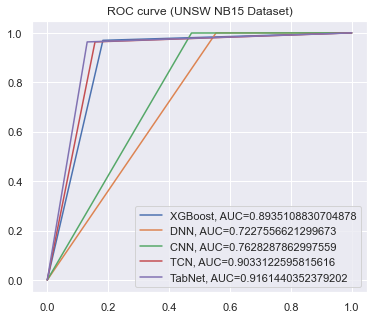

In [275]:
figsize(6, 5)
#set up plotting area
plt.figure(0).clf()

fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_xgb)
auc = roc_auc_score(y2, y_pred_xgb)
plt.plot(fpr,tpr,label="XGBoost, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y2,  y_predicted_class_DNN)
auc = roc_auc_score(y2, y_predicted_class_DNN)
plt.plot(fpr,tpr,label="DNN, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y2,  y_predicted_class_CNN)
auc = roc_auc_score(y2, y_predicted_class_CNN)
plt.plot(fpr,tpr,label="CNN, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_class_TCN)
auc = roc_auc_score(y2, y_pred_class_TCN)
plt.plot(fpr,tpr,label="TCN, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y2,  y_pred_TabNet)
auc = roc_auc_score(y2, y_pred_TabNet)
plt.plot(fpr,tpr,label="TabNet, AUC="+str(auc))

#add legend
plt.title("ROC curve (UNSW NB15 Dataset)")
plt.legend()

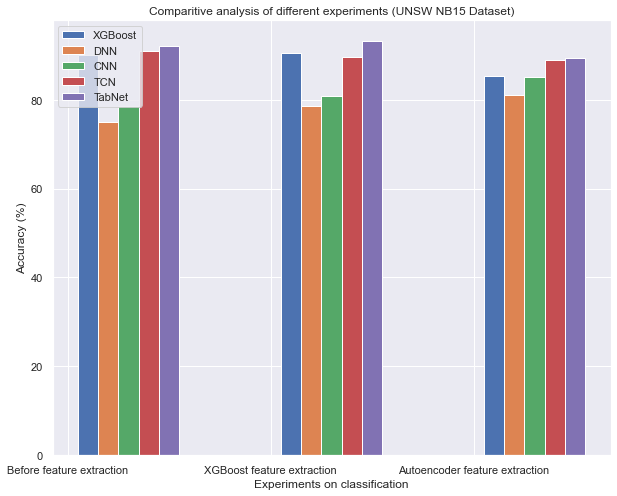

In [273]:
from IPython.core.pylabtools import figsize
figsize(10, 8)
# Import Library
import numpy as np 
import matplotlib.pyplot as plt 

# Define Data
data3 = ['Before feature extraction','XGBoost feature extraction','Autoencoder feature extraction']
xvals = [90.1,90.5,85.32]
yvals = [75.1,78.7,81.03]
zvals = [78.7,80.9,85.10]
avals = [90.9,89.7,89.00]
bvals = [92.1,93.2,89.30]

x_axis = np.arange(len(data3))

# Multi bar Chart
plt.bar(x_axis +0.1, xvals, width=0.1, label = 'XGBoost')
plt.bar(x_axis +0.1*2, yvals, width=0.1, label = 'DNN')
plt.bar(x_axis +0.1*3, zvals, width=0.1, label = 'CNN')
plt.bar(x_axis +0.1*4, avals, width=0.1, label = 'TCN')
plt.bar(x_axis +0.1*5, bvals, width=0.1, label = 'TabNet')

# Xticks
plt.xticks(x_axis,data3)
plt.ylabel("Accuracy (%)")
plt.xlabel("Experiments on classification")
plt.title("Comparitive analysis of different experiments (UNSW NB15 Dataset)")
plt.legend()
plt.show()